In [15]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

Loading and getting a gist of MNIST dataset

In [16]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [17]:
X_train.shape

(60000, 28, 28)

In [18]:
X_test.shape

(10000, 28, 28)

In [19]:
X_train[0] #2D array with values between 0 and 255 where 0 is black and 255 is white

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

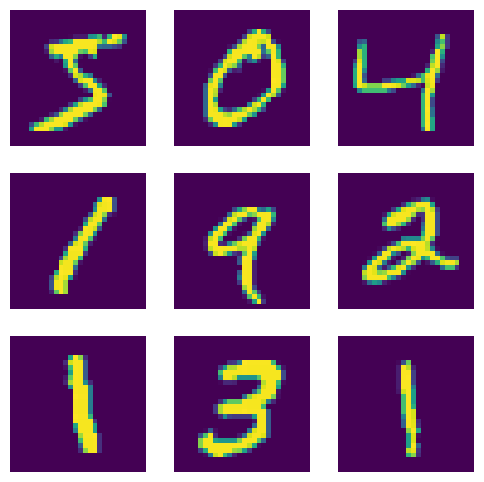

In [20]:
plt.figure(figsize=(6,6))

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i])
    plt.axis('off')

plt.show()

In [21]:
X_train = X_train/255
X_test = X_test/255

In [22]:
X_train[0] # Still a 2D array but the values are scaled

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

Creating and training MLP (Multi Layer Perceptron)

In [23]:
mlp = keras.Sequential([ # keras.sequential is a linear stack of layers, where each layer has exactly one input tensor and one output tensor.
    keras.layers.Flatten(input_shape=(28,28)), # Input layer with shape (784,) which corresponds to the flattened 28x28 pixel.
    keras.layers.Dense(128,activation ='relu'), # Hidden layer with 128 neurons and uses ReLU (Rectified Linear Unit) activation function.
    keras.layers.Dense(10,activation = 'softmax') # Output Layer with 10 neurons corresponding to the 10 possible output classes (digits 0-9).
])

mlp.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy', # sparse_categorical_crossentropy for integer labels (not one-hot)
    metrics = ['accuracy']
)

mlp.fit(X_train,y_train,epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2557 - accuracy: 0.9275
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1116 - accuracy: 0.9674
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0775 - accuracy: 0.9764
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0581 - accuracy: 0.9823
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0458 - accuracy: 0.9859
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0362 - accuracy: 0.9891
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0291 - accuracy: 0.9910
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0229 - accuracy: 0.9929
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0188 - accuracy: 0.9945
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.01

In [24]:
mlp.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0853 - accuracy: 0.9773


[0.08528868854045868, 0.9772999882698059]

In [30]:
y_predicted = mlp.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [31]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]

In [32]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

Plotting Confusion Matrix

In [33]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 969,    0,    1,    1,    1,    2,    1,    2,    1,    2],
       [   0, 1129,    3,    0,    0,    1,    1,    0,    1,    0],
       [   4,    3, 1010,    1,    1,    0,    1,    8,    2,    2],
       [   0,    0,    6,  989,    0,    6,    0,    3,    2,    4],
       [   1,    1,    3,    0,  956,    1,    4,    3,    0,   13],
       [   2,    0,    0,    8,    0,  873,    2,    2,    4,    1],
       [   6,    3,    5,    0,    4,    2,  935,    2,    1,    0],
       [   0,    5,    9,    1,    0,    1,    0, 1008,    0,    4],
       [   6,    6,    7,    6,    3,   13,    1,    5,  919,    8],
       [   1,    3,    0,    1,    9,    3,    0,    7,    0,  985]])>

In [34]:
import seaborn as sns

Text(95.72222222222221, 0.5, 'Truth')

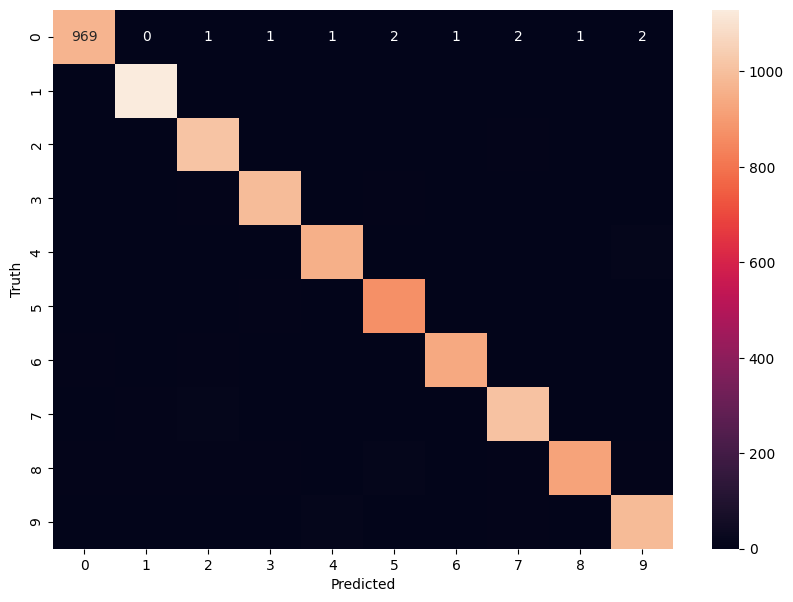

In [39]:
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
# I don't know what's the issue with my sns.heatmap it doesn't show the values properly. This issue is since long time